# Weather data download and windpower model

This example is based on [feedinlib](https://github.com/oemof/feedinlib).

In order to download ERA5 weather data you need an account at the [CDS](https://cds.climate.copernicus.eu).

Furthermore, you need to install the cdsapi package. See [here](https://cds.climate.copernicus.eu/api-how-to) for installation details. 

In [1]:
# pip install https://github.com/oemof/feedinlib/archive/master.zip

## Download data for a region<a class="anchor" id="region"></a>

In [2]:
import pandas as pd

from feedinlib import era5

In [3]:
# Enter the exact location to get the wind data from era5
latitude = 50.839
longitude = 4.375

In [4]:
# set start and end date (end date will be included
# in the time period for which data is downloaded)
start_date, end_date = '2020-07-01', '2020-07-08'
# set variable set to download
variable = "windpowerlib"

In [5]:
target_file = 'ERA5_weather_data.nc'

In [6]:
# get windpowerlib data for specified location from ERA5
db = era5.get_era5_data_from_datespan_and_position(
    variable=variable,
    start_date=start_date,
    end_date=end_date,
    latitude=latitude,
    longitude=longitude,
    target_file=target_file
)

2022-12-19 11:56:30,351 INFO Welcome to the CDS
2022-12-19 11:56:30,353 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-12-19 11:56:30,449 INFO Request is completed
2022-12-19 11:56:30,450 INFO Downloading request for 7 variables to ERA5_weather_data.nc
2022-12-19 11:56:30,451 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data5/adaptor.mars.internal-1671449127.9435737-13312-13-68232147-49be-483f-892d-99d9aa7ef662.nc to ERA5_weather_data.nc (5.9K)
2022-12-19 11:56:30,668 INFO Download rate 27.6K/s                              


In [7]:
# show the detail of the original database
db

<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 1, time: 192)
Coordinates:
  * longitude  (longitude) float32 4.5
  * latitude   (latitude) float32 50.75
  * time       (time) datetime64[ns] 2020-07-01 ... 2020-07-08T23:00:00
Data variables:
    u100       (time, latitude, longitude) float32 ...
    v100       (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    fsr        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-19 11:25:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [8]:
# Convert to windpower data
db = era5.format_windpowerlib(db)
db

variable                                     wind_speed            \
height                                              10        100   
time                      latitude longitude                        
2020-06-30 23:00:00+00:00 50.75    4.5         4.647892  8.296544   
2020-07-01 00:00:00+00:00 50.75    4.5         4.783999  8.411430   
2020-07-01 01:00:00+00:00 50.75    4.5         4.742293  8.279179   
2020-07-01 02:00:00+00:00 50.75    4.5         4.561298  8.051394   
2020-07-01 03:00:00+00:00 50.75    4.5         4.505331  7.918181   
...                                                 ...       ...   
2020-07-08 18:00:00+00:00 50.75    4.5         3.718186  6.201575   
2020-07-08 19:00:00+00:00 50.75    4.5         3.764095  6.348302   
2020-07-08 20:00:00+00:00 50.75    4.5         3.830744  6.435240   
2020-07-08 21:00:00+00:00 50.75    4.5         3.044057  5.748418   
2020-07-08 22:00:00+00:00 50.75    4.5         3.115550  5.853598   

variable                                           pressure temperature  \
height                                                  0           2     
time                      latitude longitude                              
2020-06-30 23:00:00+00:00 50.75    4.5         99895.257812  291.370056   
2020-07-01 00:00:00+00:00 50.75    4.5         99834.125000  291.038635   
2020-07-01 01:00:00+00:00 50.75    4.5         99805.109375  290.606995   
2020-07-01 02:00:00+00:00 50.75    4.5         99780.929688  290.483368   
2020-07-01 03:00:00+00:00 50.75    4.5         99752.445312  290.495575   
...                                                     ...         ...   
2020-07-08 18:00:00+00:00 50.75    4.5        100654.484375  289.330109   
2020-07-08 19:00:00+00:00 50.75    4.5        100667.921875  289.324005   
2020-07-08 20:00:00+00:00 50.75    4.5        100669.125000  289.226807   
2020-07-08 21:00:00+00:00 50.75    4.5        100673.312500  289.118195   
2020-07-08 22:00:00+00:00 50.75    4.5        100613.546875  289.032196   

variable                                     roughness_length  
height                                                    0    
time                      latitude longitude                   
2020-06-30 23:00:00+00:00 50.75    4.5               0.362707  
2020-07-01 00:00:00+00:00 50.75    4.5               0.362807  
2020-07-01 01:00:00+00:00 50.75    4.5               0.362807  
2020-07-01 02:00:00+00:00 50.75    4.5               0.362806  
2020-07-01 03:00:00+00:00 50.75    4.5               0.362806  
...                                                       ...  
2020-07-08 18:00:00+00:00 50.75    4.5               0.362805  
2020-07-08 19:00:00+00:00 50.75    4.5               0.362774  
2020-07-08 20:00:00+00:00 50.75    4.5               0.362792  
2020-07-08 21:00:00+00:00 50.75    4.5               0.362804  
2020-07-08 22:00:00+00:00 50.75    4.5               0.362805  

[192 rows x 5 columns]

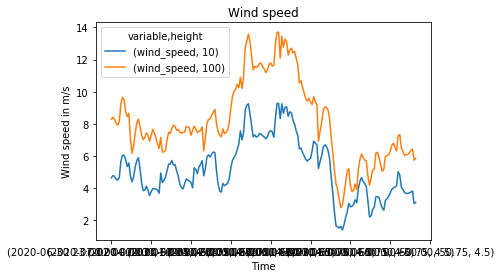

In [9]:
# plot wind speed
import matplotlib.pyplot as plt
%matplotlib inline
db.loc[:, ['wind_speed']].plot(title='Wind speed')
plt.xlabel('Time')
plt.ylabel('Wind speed in m/s');

## Set up WindPowerPlant object

You can use the windpower plant from the datqabase, or create your own plant for modeling.

In [10]:
from feedinlib import WindPowerPlant
from feedinlib import get_power_plant_data

In [11]:
turbine_df = get_power_plant_data(dataset='oedb_turbine_library')
# print the first four turbines
turbine_df.iloc[1:5, :]

,manufacturer,turbine_type,has_power_curve,has_cp_curve
1,Enercon,E-101/3050,True,True
2,Enercon,E-101/3500,True,True
3,Enercon,E-115/3000,True,True
4,Enercon,E-115/3200,True,True


In [12]:

my_turbine = {
    'nominal_power': 2000,  # in W
    'hub_height': 15,  # in m
    'power_curve': pd.DataFrame(
            data={'value': [p for p in [
                      0.0, 400.0, 900.0, 1800.0, 2000.0, 1700.0]],  # in W
                  'wind_speed': [0.0, 3.0, 6.0, 10.0, 12.0, 15.0]})  # in m/s
    }  
# initialize WindTurbine object
wind_turbine = WindPowerPlant(**my_turbine)

In [13]:
feedin = wind_turbine.feedin(
    weather=db)

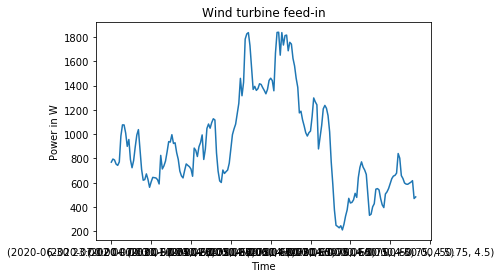

In [14]:
# plot calculated feed-in
import matplotlib.pyplot as plt
%matplotlib inline
feedin.plot(title='Wind turbine feed-in')
plt.xlabel('Time')
plt.ylabel('Power in W');

In [15]:
df=pd.DataFrame(feedin)

In [16]:
df

,,,feedin_power_plant
time,latitude,longitude,
2020-06-30 23:00:00+00:00,50.75,4.5,769.347731
2020-07-01 00:00:00+00:00,50.75,4.5,794.813538
2020-07-01 01:00:00+00:00,50.75,4.5,787.012800
2020-07-01 02:00:00+00:00,50.75,4.5,753.158792
2020-07-01 03:00:00+00:00,50.75,4.5,742.690547
...,...,...,...
2020-07-08 18:00:00+00:00,50.75,4.5,595.460637
2020-07-08 19:00:00+00:00,50.75,4.5,604.045534
2020-07-08 20:00:00+00:00,50.75,4.5,616.512839
